In [1]:
## Name - Sheel Nidhan
## Date - 07 Jan, 2020
## This code coarse-grains the velocity field which can be used for further post-processing
# Check Yasuda and Vassilicos PRF 2019

In [2]:
import numpy as np
import matplotlib as ml
import matplotlib.pyplot as plt
import ioeddy as io 
import matplotlib.gridspec as gridspec
import pandas as pd
from scipy.ndimage import uniform_filter
from scipy.ndimage import gaussian_filter
from scipy.signal import medfilt

In [3]:
path='./'
filename = path + 'w_02635000.res'
i,j,k,it,time,dt,grav,data = io.readres(filename)

In [4]:
print('i,j,k=', i,j,k)
print('dtm=',dt)
print('grav=', grav)
print('size=',data.shape)
print('data=',data[1,2,5])
print('max_data=', np.nanmax(data))
print('min_data=', np.nanmin(data))
print('nstep=',it)

i,j,k= 366 258 4610
dtm= 0.0006914533758909792
grav= 0.0
size= (366, 258, 4610)
data= 0.9999900350997807
max_data= 1.7034594879374365
min_data= -1.3731562577376357
nstep= 2635000


In [5]:
nx, index, x, xe, xc = io.readgrid(path + 'x3_grid.in')
nr, index, r, re, rc = io.readgrid(path + 'x1_grid.in')
nth, index, th, the, thc = io.readgrid(path + 'x2_grid.in')

In [6]:
## Debug block 

In [7]:
xedges = thc
xedges[0]=0
yedges = rc[1:-1]
X,Y =np.meshgrid(xedges, yedges)

In [8]:
xedges = xc
#xedges[0]=0
rcng=rc
yedges2 = np.concatenate((-rcng[::-1],rcng),axis=0)
#yedges=yedges[1:-1]
X2,Y2 =np.meshgrid(xedges, yedges2)

In [9]:
## Axial slices

data_slice_2 = data[:,127,:]
data_slice_3 = -data[:,255,:]
data_slice_4 =np.concatenate((np.flip(data_slice_3,axis=0),data_slice_2),axis=0)

In [10]:
## Debug block

print(np.shape(data_slice_4))

(732, 4610)


In [11]:
df_X2 = pd.DataFrame(X2,    index=yedges2, columns=xedges)
df_Y2 = pd.DataFrame(Y2,    index=yedges2, columns=xedges)
df_U2 = pd.DataFrame(data_slice_4, index=yedges2, columns=xedges)

xmin = 0
xmax = 30
ymin = 0
ymax = 5

roi2 = (0<= df_X2) & (df_X2 <= 80) & (-5 <= df_Y2) & (df_Y2 <= 5)

df_X2_crop = df_X2[roi2].dropna(axis=[0,1], how='all')
df_Y2_crop = df_Y2[roi2].dropna(axis=[0,1], how='all')
df_U2_crop = df_U2[roi2].dropna(axis=[0,1], how='all')

/home/sheel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  if sys.path[0] == '':
/home/sheel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  del sys.path[0]
/home/sheel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  


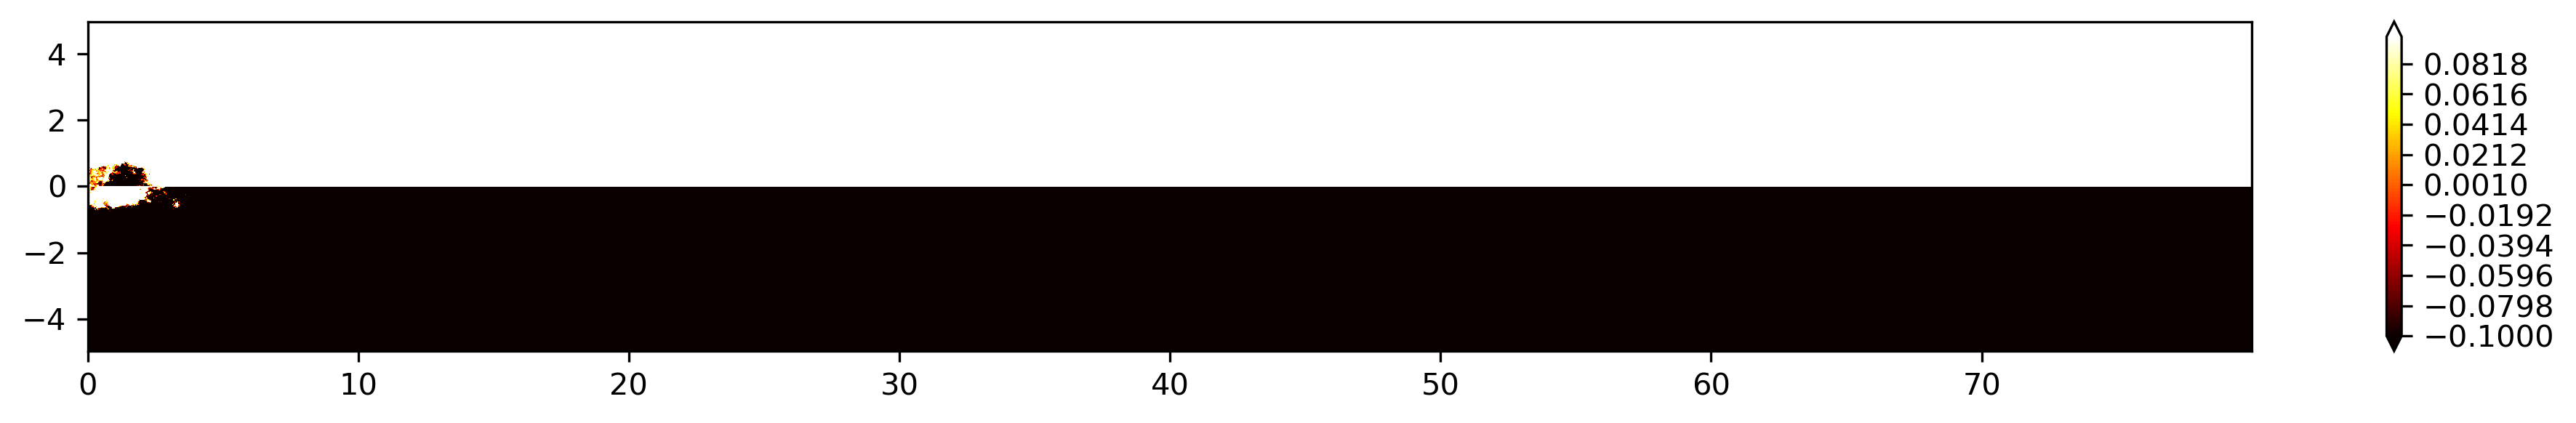

In [12]:
fig2 = plt.figure(figsize=(16,2), dpi=300)
gsp2 = gridspec.GridSpec(1,1)
plt.subplot(gsp2[0,0])
lvls = np.linspace(-0.1, 0.1, 100)

plt.contourf(df_X2_crop, df_Y2_crop, df_U2_crop,levels=lvls,cmap='hot',extend='both')
plt.colorbar()
# plt.savefig('w_02635000.png', bbox_inches='tight', dpi = 500)
plt.show()

In [13]:
## Filtering the full data 
sigma_val = 15
# filtered_vel = uniform_filter(data_filter2, size=3, mode='constant')
filtered_vel = gaussian_filter(data, sigma = sigma_val)
remaining_vel = data - filtered_vel

In [14]:
## Axial slices

data_slice_2 = filtered_vel[:,127,:]
data_slice_3 = -filtered_vel[:,255,:]
data_slice_4 =np.concatenate((np.flip(data_slice_3,axis=0),data_slice_2),axis=0)

In [15]:
df_X2 = pd.DataFrame(X2,    index=yedges2, columns=xedges)
df_Y2 = pd.DataFrame(Y2,    index=yedges2, columns=xedges)
df_U2 = pd.DataFrame(data_slice_4, index=yedges2, columns=xedges)

xmin = 0
xmax = 30
ymin = 0
ymax = 5

roi2 = (0<= df_X2) & (df_X2 <= 80) & (-5 <= df_Y2) & (df_Y2 <= 5)

df_X2_crop = df_X2[roi2].dropna(axis=[0,1], how='all')
df_Y2_crop = df_Y2[roi2].dropna(axis=[0,1], how='all')
df_U2_crop = df_U2[roi2].dropna(axis=[0,1], how='all')

/home/sheel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  if sys.path[0] == '':
/home/sheel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  del sys.path[0]
/home/sheel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  


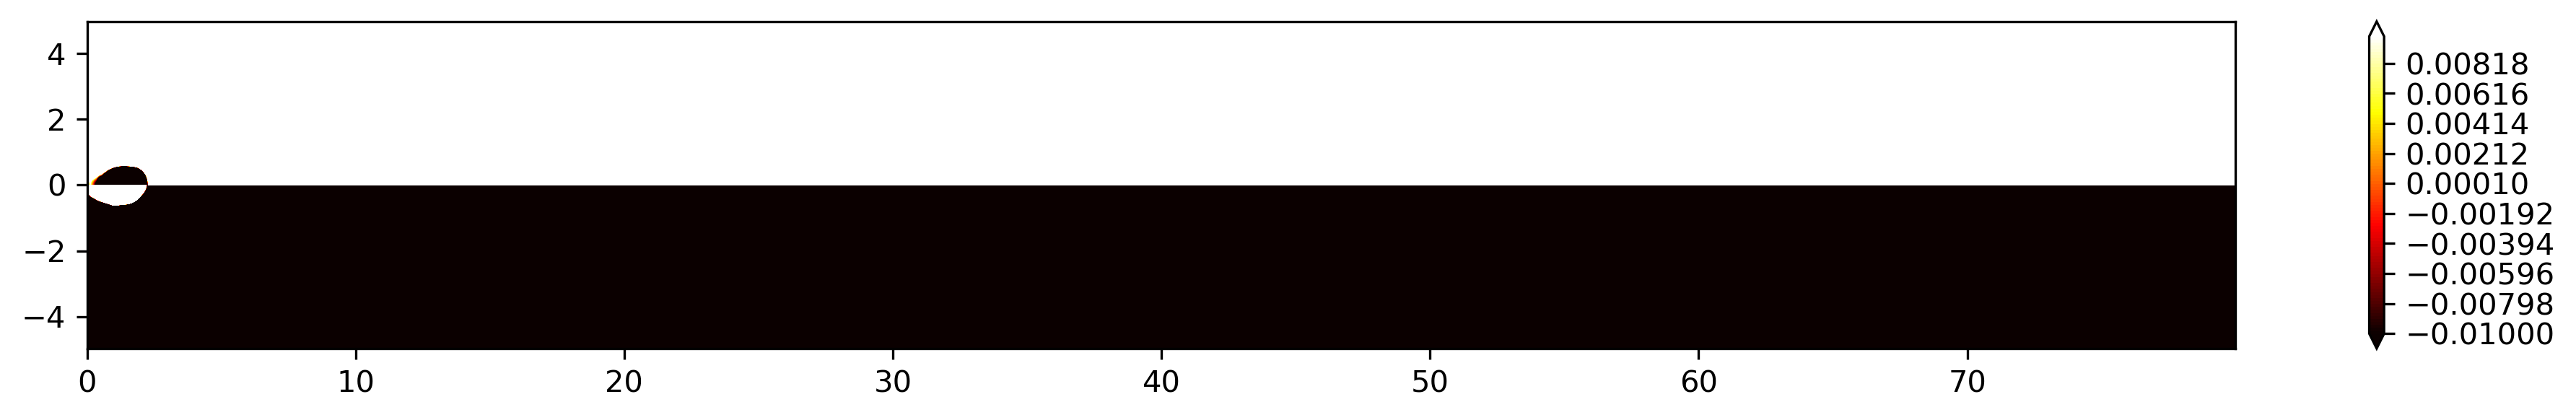

In [16]:
fig2 = plt.figure(figsize=(16,2), dpi=300)
gsp2 = gridspec.GridSpec(1,1)
plt.subplot(gsp2[0,0])
lvls = np.linspace(-0.01, 0.01, 100)

plt.contourf(df_X2_crop, df_Y2_crop, df_U2_crop,levels=lvls,cmap='hot',extend='both')
plt.colorbar()
# plt.savefig('w_02635000_filtered_10sigma.png', bbox_inches='tight', dpi = 500)
plt.show()

In [17]:
## Axial slices

data_slice_2 = remaining_vel[:,127,:]
data_slice_3 = -remaining_vel[:,255,:]
data_slice_4 =np.concatenate((np.flip(data_slice_3,axis=0),data_slice_2),axis=0)

In [18]:
df_X2 = pd.DataFrame(X2,    index=yedges2, columns=xedges)
df_Y2 = pd.DataFrame(Y2,    index=yedges2, columns=xedges)
df_U2 = pd.DataFrame(data_slice_4, index=yedges2, columns=xedges)

xmin = 0
xmax = 30
ymin = 0
ymax = 5

roi2 = (0<= df_X2) & (df_X2 <= 80) & (-5 <= df_Y2) & (df_Y2 <= 5)

df_X2_crop = df_X2[roi2].dropna(axis=[0,1], how='all')
df_Y2_crop = df_Y2[roi2].dropna(axis=[0,1], how='all')
df_U2_crop = df_U2[roi2].dropna(axis=[0,1], how='all')

/home/sheel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  if sys.path[0] == '':
/home/sheel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  del sys.path[0]
/home/sheel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  


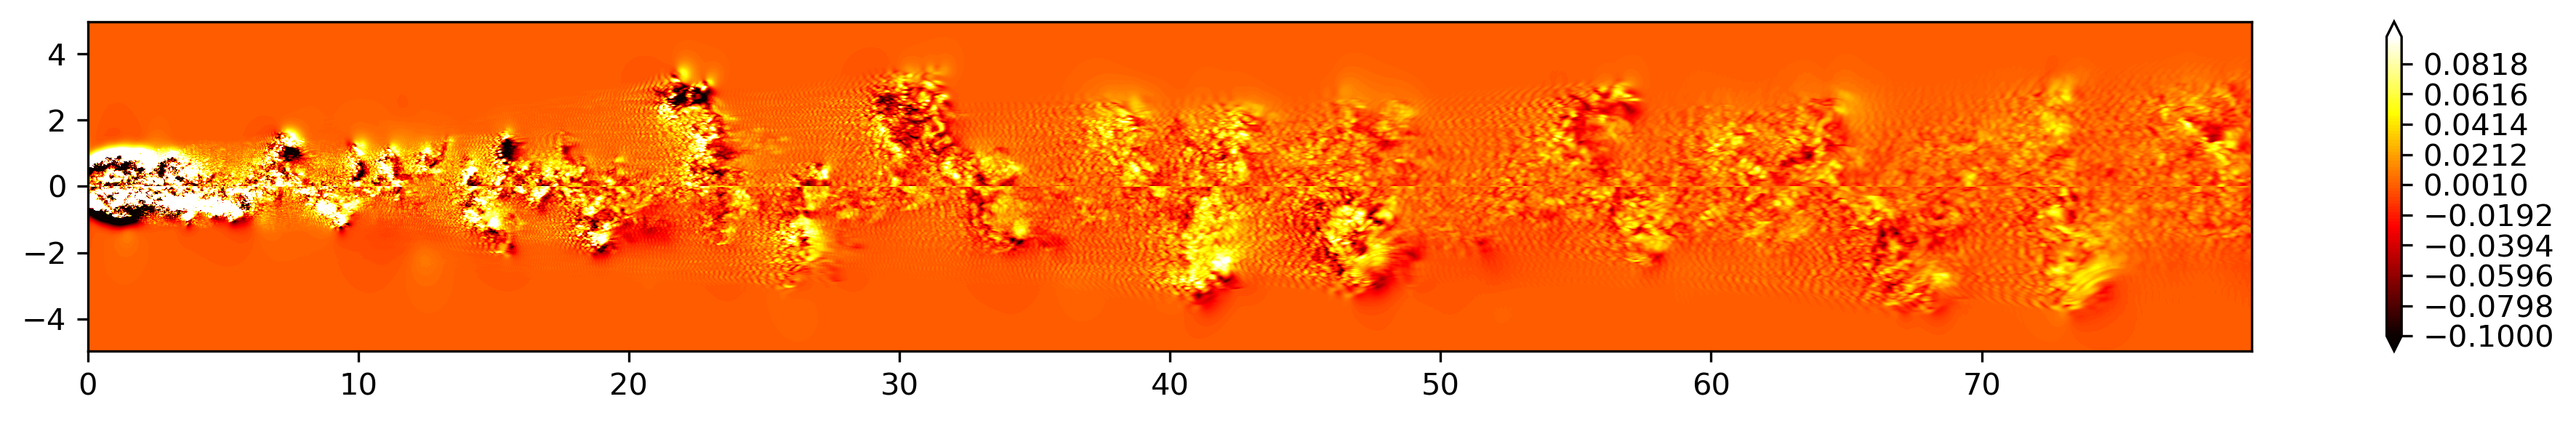

In [19]:
fig2 = plt.figure(figsize=(16,2), dpi=300)
gsp2 = gridspec.GridSpec(1,1)
plt.subplot(gsp2[0,0])
lvls = np.linspace(-0.1, 0.1, 100)

plt.contourf(df_X2_crop, df_Y2_crop, df_U2_crop,levels=lvls,cmap='hot',extend='both')
plt.colorbar()
# plt.savefig('w_02635000_remaining_10sigma.png', bbox_inches='tight', dpi = 500)
plt.show()

In [20]:
## Writing out the velocity to a Fortran type file

filename='w_02635000_original_grid_gaussian_filter_sigma_15.res'
data_f = filtered_vel[:,:,:].reshape(nr+1,nth+1,nx+1,order='F')
data_f.T.tofile(filename)

In [21]:
# ## Writing out the velocity to a Fortran type file

# filename='u_02635000_original_grid_remaining_after_filter_sigma_20.res'
# data_f = remaining_vel[:,:,:].reshape(nr+1,nth+1,nx+1,order='F')
# data_f.T.tofile(filename)